In [41]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict


In [42]:
load_dotenv()

True

In [43]:
model = ChatGroq(
    model="openai/gpt-oss-120b",
    temperature=0.5
)

In [44]:
class CodeState(TypedDict):
    code: str
    errors: str
    new_code: str

In [45]:
def error_detect(state: CodeState) -> CodeState:
    code = state['code']

    prompt1 = f'Detect and List Down all the sytax error and logical error of this {code}'

    errors = model.invoke(prompt1).content

    state['errors'] = errors

    return state


In [46]:
def gen_new_code(state: CodeState) -> CodeState:
    code = state['code']
    errors = state['errors']

    prompt2 = f'give me the only new and fresh code of the wrong code \n code: {code} \n errors {errors}'

    new_code = model.invoke(prompt2).content

    state['new_code'] = new_code

    return state

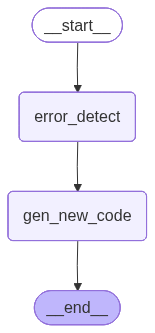

In [49]:
graph = StateGraph(CodeState)

# nodes
graph.add_node('error_detect', error_detect)
graph.add_node('gen_new_code', gen_new_code)

# edges
graph.add_edge(START, 'error_detect')
graph.add_edge('error_detect', 'gen_new_code')
graph.add_edge('gen_new_code', END)

workflow = graph.compile()
workflow

In [48]:
code = """
class BankSystem {

    static int balance = 10000;

    public static void main(String[] args) {

        int[] transactions = {2000, -500, 3000, -12000, 1500};

        int total = calculateTotal(transactions)

        if (balance > 0) {
            System.out.println("Initial Balance: " + balance);
        }

        for (int i = 0; i < transactions.length; i++) {
            updateBalance(transactions[i]);
        }

        if (balance = 0) {
            System.out.println("Account Empty");
        } else if (balance < 0) {
            System.out.println("Overdraft");
        } else {
            System.out.println("Final Balance: " + balance)
        }

        double avg = total / transactions.length * 1.0;
        System.out.println("Average Transaction: " + avg);
    }

    static int calculateTotal(int[] arr) {
        int sum = 0;
        for (int i = 0; i <= arr.length; i++) {
            sum = sum + arr[i];
        }
        return sum;
    }

    static void updateBalance(int amount) {
        if (amount > balance)
            balance = balance - amount;
        else
            balance = balance + amount;
    }

"""
intial_state = {
    'code': code
}

final_state = workflow.invoke(intial_state)

print(final_state['code'])
print(final_state['errors'])
print(final_state['new_code'])


class BankSystem {

    static int balance = 10000;

    public static void main(String[] args) {

        int[] transactions = {2000, -500, 3000, -12000, 1500};

        int total = calculateTotal(transactions)

        if (balance > 0) {
            System.out.println("Initial Balance: " + balance);
        }

        for (int i = 0; i < transactions.length; i++) {
            updateBalance(transactions[i]);
        }

        if (balance = 0) {
            System.out.println("Account Empty");
        } else if (balance < 0) {
            System.out.println("Overdraft");
        } else {
            System.out.println("Final Balance: " + balance)
        }

        double avg = total / transactions.length * 1.0;
        System.out.println("Average Transaction: " + avg);
    }

    static int calculateTotal(int[] arr) {
        int sum = 0;
        for (int i = 0; i <= arr.length; i++) {
            sum = sum + arr[i];
        }
        return sum;
    }

    static void updateBalanc